In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import *

In [2]:
file_path = "../data/surveyDataSience.csv"
data = read_csv(file_path, skiprows=1, low_memory=False)

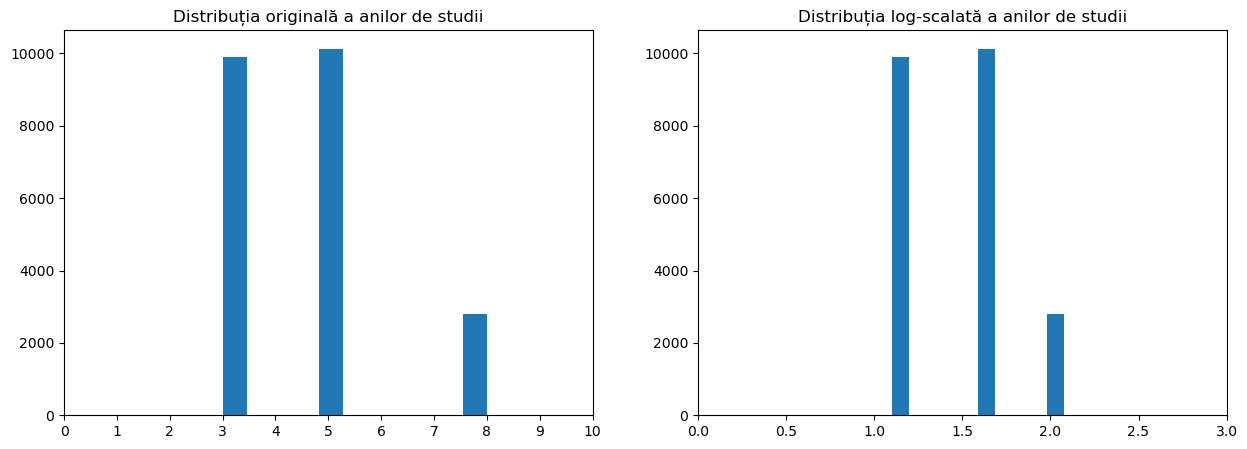

In [3]:
education_years = {
    "Bachelor’s degree": 3,
    "Master’s degree": 5,
    "Doctoral degree": 8
}

data_filtered = data.dropna(subset=["What is the highest level of formal education that you have attained or plan to attain within the next 2 years?"])

data_filtered["Years_of_Education"] = data_filtered[
    "What is the highest level of formal education that you have attained or plan to attain within the next 2 years?"
].map(education_years)

data_filtered = data_filtered.dropna(subset=["Years_of_Education"])

# Aplicăm log-scaling pe numărul de ani de educație
data_filtered["Log_Years_of_Education"] = np.log(data_filtered["Years_of_Education"])

# Creăm histograma pentru a vizualiza distribuția înainte și după normalizare
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.hist(data_filtered["Years_of_Education"], bins=np.arange(0, 11, 1).size)
ax1.set_title("Distribuția originală a anilor de studii")
ax1.set_xticks(np.arange(0, 11, 1))

ax2.hist(data_filtered["Log_Years_of_Education"], bins=10)
ax2.set_title("Distribuția log-scalată a anilor de studii")
ax2.set_xticks([i * 0.5 for i in range(7)])

plt.show()

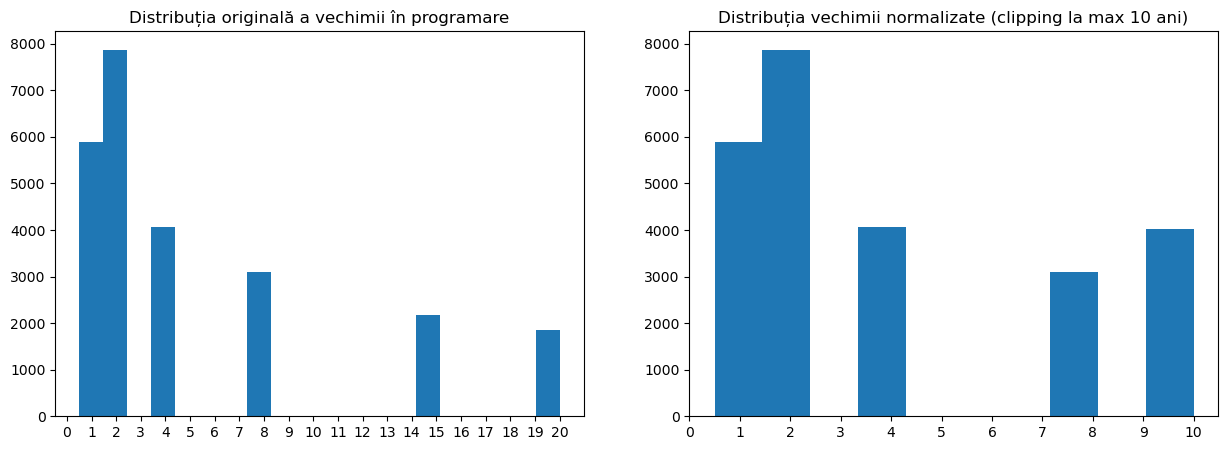

In [9]:
data_filtered = data.dropna(subset=["For how many years have you been writing code and/or programming?"])

# Funcție pentru a extrage numărul de ani din răspunsurile text
def parse_experience(exp):
    exp = exp.strip().lower()

    if "-" in exp:
        first, second = map(int, exp.split(" ")[0].split("-"))
        return (first + second) / 2
    elif "+" in exp:
        return float(exp.split(" ")[0].replace("+", ""))
    elif "<" in exp:
        return 0.5
    else:
        try:
            return float(exp.split(" ")[0])
        except ValueError:
            return np.nan

data_filtered["Years_of_Experience"] = data_filtered[
    "For how many years have you been writing code and/or programming?"
].map(parse_experience)

data_filtered = data_filtered.dropna(subset=["Years_of_Experience"])

data_filtered["Clipped_Experience"] = np.clip(data_filtered["Years_of_Experience"], 0, 10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.hist(data_filtered["Years_of_Experience"], bins=20)
ax1.set_title("Distribuția originală a vechimii în programare")
ax1.set_xticks(range(0, 21))

ax2.hist(data_filtered["Clipped_Experience"], bins=10)
ax2.set_title("Distribuția vechimii normalizate (clipping la max 10 ani)")
ax2.set_xticks(np.arange(0, 11, 1))

plt.show()

In [11]:
import os
from PIL import Image
from sklearn.preprocessing import MinMaxScaler

In [12]:
file_path1 = "../data/images1"

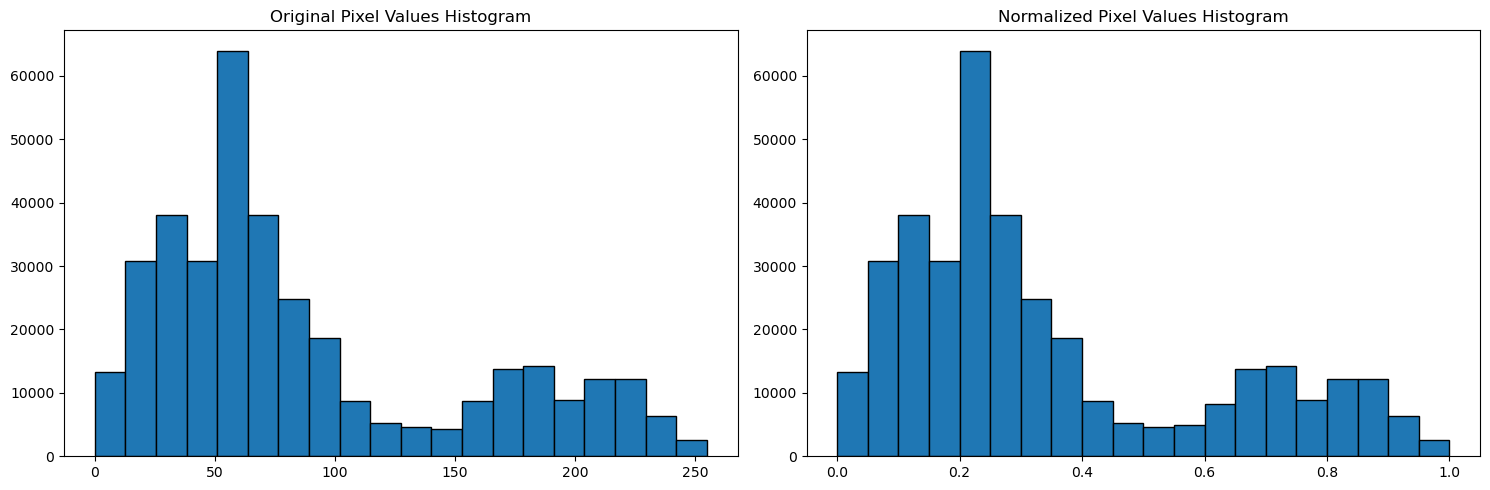

In [21]:
images = []

for filename in os.listdir(file_path1):
    if filename.endswith(('.png', '.jpg', '.webp')):
        image_path = os.path.join(file_path1, filename)
        image = Image.open(image_path)
        images.append(image)

image = images[0]

pixel_values = np.array(image).flatten()

scaler = MinMaxScaler()
normalized_pixel_values = scaler.fit_transform(pixel_values.reshape(-1, 1)).flatten()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Histogramă pentru valorile pixelilor originali
ax1.hist(pixel_values, bins=20, edgecolor='black')
ax1.set_title('Original Pixel Values Histogram')

# Histogramă pentru valorile pixelilor normalizați
ax2.hist(normalized_pixel_values, bins=20, edgecolor='black')
ax2.set_title('Normalized Pixel Values Histogram')

plt.tight_layout()
plt.show()

In [7]:
from nltk import *

In [8]:
file_path2 = "../data/texts.txt"

with open(file_path2, 'r', encoding='utf-8') as file:
    text = file.read()

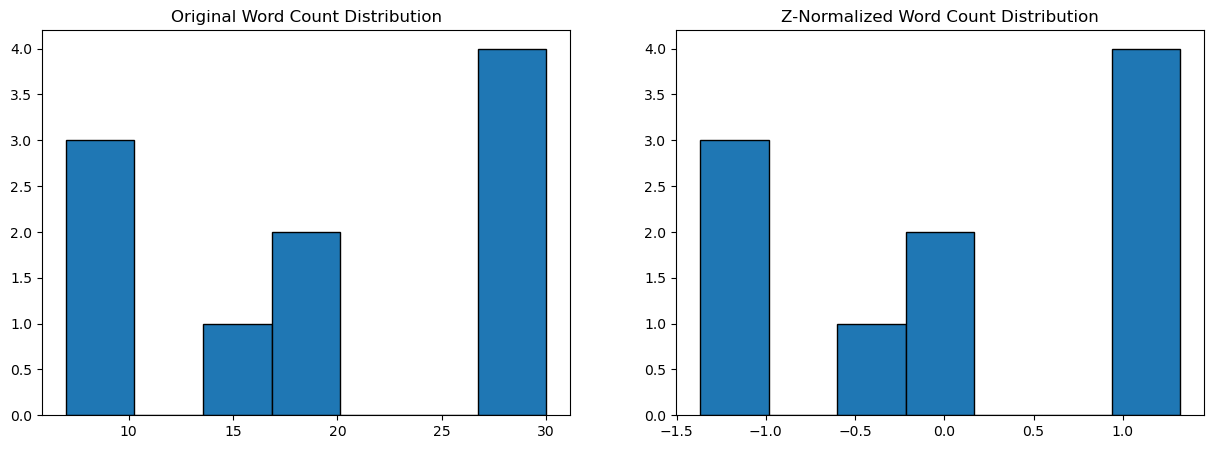

In [10]:
sentences = sent_tokenize(text)

word_counts = [sum(FreqDist(word_tokenize(sentence)).values()) for sentence in sentences]

word_counts = np.array(word_counts)
mean = np.mean(word_counts)
std = np.std(word_counts, ddof=0)  # Population standard deviation
normalized = (word_counts - mean) / std if std != 0 else word_counts - mean

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.hist(word_counts, bins=7, edgecolor='black')
ax1.set_title('Original Word Count Distribution')

ax2.hist(normalized, bins=7, edgecolor='black')
ax2.set_title('Z-Normalized Word Count Distribution')

plt.show()